## Digit Recognizer

(a) Join the Digit Recognizer competition on Kaggle. Download the training and test data. The competition page describes how these files are formatted.

In [4]:
import pandas as pd
digit_train = pd.read_csv('digit_train.csv')
digit_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(b) Write a function to display an MNIS Tdigit. Display one of each digit.

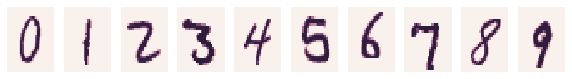

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def display(df, i, tick_visible = False):
    digit = df.iloc[i][1:].values.reshape(28,28)
    sns.heatmap(digit, cbar = False, xticklabels = tick_visible, yticklabels = tick_visible)
    return

plt.figure(figsize = (10,1.2))
for i in range(0,10):
    n = digit_train[digit_train.label == i].index[2]
    plt.subplot(1,10,i+1)
    display(digit_train, n)
plt.show()

(c) Examine the prior probability of the classes in the training data. Is it uniform across the digits? Display a normalized histogram of digit counts. Is it even?

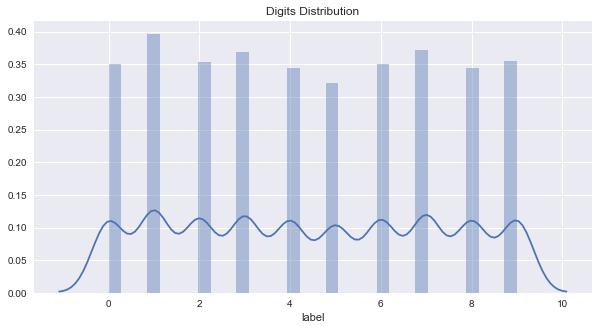

In [6]:
plt.figure(figsize = (10,5))
plt.title('Digits Distribution')
ax = sns.distplot(digit_train.label)
plt.show()

(d) Pick one example of each digit from your training data. Then, for each sample digit,compute and show the best match (nearest neighbor) between your chosen sample and the rest of the training data. Use L2 distance between the two images’ pixel values as the metric. This probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).

In [7]:
from scipy.spatial.distance import cdist
train_x = digit_train[digit_train.columns[1:]]
train_y = digit_train.label.as_matrix
sample = train_x.iloc[10:12]

#Get top 10 nearest neighbors
def matrix(df, sample):
    if len(sample.shape) == 1:
        sample = sample.values.reshape(1,-1)
    matrix = cdist(train_x, sample, 'euclidean')
    return matrix

def index(matrix, n):
    return np.argsort(matrix, axis = 0)[:n, ]

def distance(matrix, n):
    return np.sort(matrix, axis = 0)[:n, ]

In [8]:
m = matrix(train_x, sample)
print(index(m, 5))
print(distance(m, 5))

[[   10    11]
 [32586 35742]
 [35135 25790]
 [23551    58]
 [25240 23630]]
[[    0.             0.        ]
 [ 1593.777588     910.57674031]
 [ 1654.5585514    924.78483984]
 [ 1669.95029866   972.36361512]
 [ 1686.01957284   975.564452  ]]


In [9]:
sample_index = [0,1,3,6,7,8,10,11,16,21]
sample_digit = train_x.iloc[sample_index]
dis_matrix = matrix(train_x, sample_digit)
best_matches = index(dis_matrix, 2)
dis = distance(dis_matrix, 2)
best_match = best_matches[1,]
best_dis = dis[1,]

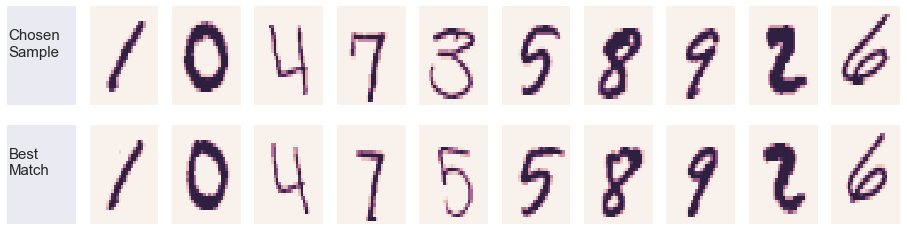

In [10]:
plt.figure(figsize = (16,4))

for i in range(10):
    plt.subplot(2,11,i+2)
    display(digit_train, sample_index[i])
    
    plt.subplot(2,11,i+13)
    display(digit_train, best_match[i])
    
    
fig = plt.subplot(2, 11, 1 )
plt.text(0.02, 0.5, "Chosen\nSample", fontsize = 15)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

fig = plt.subplot(2, 11, 12 )
plt.text(0.02, 0.5, "Best\nMatch", fontsize = 15)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()    

In [11]:
pd.DataFrame(data = {'Chosen Digit': digit_train.label[sample_index], 'Chosen_digit_index': sample_index,
                     'Best_matches_Index' : best_match, 'Distance': best_dis})

,Best_matches_Index,Chosen Digit,Chosen_digit_index,Distance
0,29704,1,0,489.679487
1,12950,0,1,1046.595433
3,14787,4,3,1356.880982
6,15275,7,6,863.501013
7,8981,3,7,1832.664999
8,30073,5,8,1066.367666
10,32586,8,10,1593.777588
11,35742,9,11,910.576740
16,9536,2,16,1380.877257
21,16240,6,21,1446.511320


(e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other digits, compute the pairwise distances for all genuine matches and all impostor matches, again using the L2 norm. Plot histograms of the genuine and impostor distances on the same set of axes.


In [12]:
import sklearn.metrics.pairwise
one_zero = digit_train[digit_train.label <= 1]
one_zero = one_zero.sort_values('label')
num_of_0 = (one_zero.label == 0).sum()
num_of_1 = (one_zero.label == 1).sum()
one_zero = one_zero.drop('label', axis = 1)
dis_m_2 = sklearn.metrics.pairwise.pairwise_distances(one_zero)

In [13]:
true_0 = dis_m_2[:num_of_0, :num_of_0].reshape(1,4132**2)
true_1 = dis_m_2[num_of_0:, num_of_0:].reshape(1,4684**2)
false_0 = dis_m_2[:num_of_0, num_of_0:].reshape(1,4684*4132)
false_1 = dis_m_2[num_of_0:, :num_of_0].reshape(1,4684*4132)
true = np.append(true_0, true_1)
false = np.append(false_0, false_1)

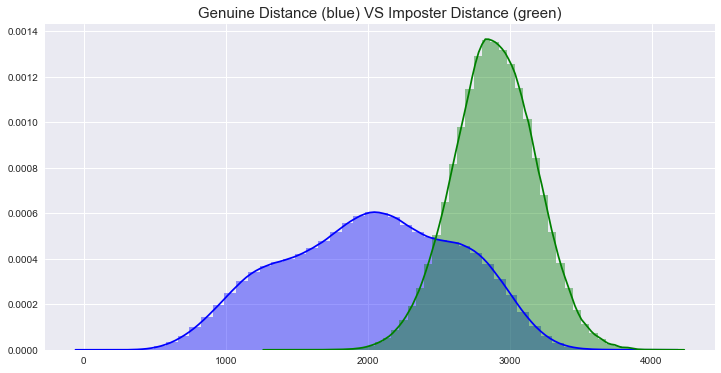

In [14]:
plt.figure(figsize = (12,6))
sns.distplot(true, color = 'b')
sns.distplot(false, color = 'g')
plt.title('Genuine Distance (blue) VS Imposter Distance (green)', fontsize = 15)
plt.show()

(f) Generate an ROC curve from the above sets of distances. What is the equal error rate? What is the error rate of a classifier that simply guesses randomly?

In [15]:
def error(s):
    TP = (true <= s).sum()
    FN = len(true) - TP
    FP = (false <= s).sum()
    TN = len(false) - FP
    return TP, TN, FP, FN

t = list(range(0, 4132, 25))
a = np.array(list(map(error, t)))
TP_rate = a[:,0]/(a[:,0] + a[:,3])
FP_rate = a[:,2]/(a[:,2] + a[:,1])

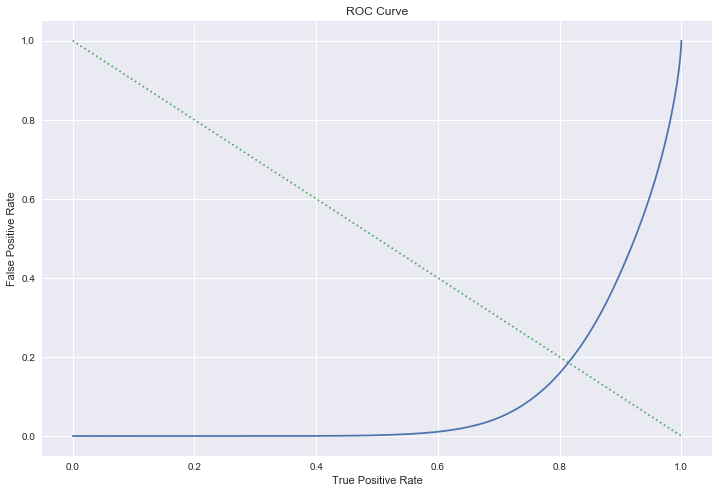

In [16]:
ax = plt.figure(figsize = (12,8))
plt.title('ROC Curve')
plt.plot(TP_rate, FP_rate)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.plot([0,1], [1,0], linestyle = ':')
plt.show()

In [17]:
FAR = a[:, 2]/len(true)
FRR = a[:, 3]/len(false)
e_df = pd.DataFrame({'FAR' : FAR, 'FRR' : FRR})
e_df['diff'] = abs(e_df.FAR - e_df.FRR)
mn = min(e_df['diff'])
e_df[e_df['diff'] == mn]

,FAR,FRR,diff
105,0.177021,0.190798,0.013776


(g) Implement a K-NN classifier. (You cannot use external libraries for this question; it should be your own implementation.)

In [33]:
test_x = pd.read_csv('digit_test.csv') 
test = test_x

In [31]:
from scipy.stats import mode
import itertools

def weight(v):
    n = len(v)
    ls = []
    for i in range(n):
        ls.append([v[i]]*(n-i))
    return mode(list(itertools.chain.from_iterable(ls)))[0][0]

def knn(train, test, k=10):
    dis_matrix = matrix(train, test)
    ind = index(dis_matrix, k)
    matches = pd.DataFrame(ind).applymap(lambda i: digit_train.label.iloc[i])
    best_match = matches.apply(weight)
    return list(best_match)


In [8]:
from multiprocessing import Pool
import time

def knn_model(x):
    return knn(digit_train, x, 10)

def multi_proc(t):
    if __name__ == "__main__":
        t1 = time.time()
        p = Pool()
        result = p.map(knn_model, t)
        p.close()
        p.join()
        
        a = []
        for x in result:
            a += x
    return a

def split(df,n):
    ls = []
    k = round(len(df)/n)
    for i in range(n+1):
        if i < n:
            ls.append(df.iloc[i*k: (i+1)*k])
        else: 
            ls.append(df.iloc[i*k:])
    return ls

In [10]:
def knn_predict(train, test, k):
    #create_model(train, k)
    n = len(test)
    if n < 10:
        prediction = knn(train, test, k)
    else:   
        test_splited = split(test, round(n**0.5))
        prediction = multi_proc(test_splited)    
    return pd.DataFrame({'ImageId': range(1,n+1), 'Label': prediction})

(h) Using the training data for all digits, perform 3 fold cross-validation on your K-NN classifier and report your average accuracy.

In [ ]:
from sklearn.model_selection import KFold

def kf(df, k):
    x = df
    kfold = KFold(n_splits = k)
    score = []
    t_p = []
    for train_id, test_id in kfold.split(x):
        train = df.iloc[train_id]
        test = df.iloc[test_id]
        train_x = train.drop('label', axis = 1)
        train_y = train.label
        test_x = test.drop('label', axis = 1)
        test_y = test.label
        
        prediction = knn_predict(train, test_x, 10)
        accuracy = (np.array(test_y) == np.array(prediction.Label)).sum()/len(test_y)        
        score.append(accuracy)
        t_p.append(pd.DataFrame({'True': np.array(test_y), 'Prediction': np.array(prediction.Label)}))
    return score, t_p

score, t_p = kf(digit_train, 3)
score

(i) Generate a confusion matrix (of size 10 x 10) from your results. Which digits are particularly tricky to classify?


In [ ]:
tp = pd.concat(t_p).reset_index()
tp = tp[['Prediction', 'True']]

In [ ]:
cf_matrix = []
for i in range(10):
    for j in range(10):
        df1 = tp[tp['True'] == i]
        df2 = df1[df1['Prediction'] == j]
        cf_matrix.append(len(df2))

In [ ]:
print('True for index, and prediction for column name')
pd.DataFrame(np.array(cf_matrix).reshape(10,10), 
             columns = [str(a) for a in range(10)])

    It looks like that 2, 7, 8, 9 particularly tricky to classify.

(j) Train your classifier with all of the training data, and test your classifier with the test data. Submit your results to Kaggle.

In [34]:
import time
t1 = time.time()
prediction = knn_predict(digit_train, test, 10)
print('took', time.time() - t1)

took 280.2535710334778


In [ ]:
prediction.head(5)

In [35]:
# export prediction 
prediction.to_csv('prediction3.csv', index = False)